# Statistical Analysis: Impact of Marketing Campaigns on Different Customer Groups

The goal is to determine the impact of marketing campaigns on different groups of customer.

##  Imports and Reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')


In [2]:
# Set the options for maximum columns to display
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r'C:\Users\Sandiswe Buthelezi\Desktop\ifood_df.csv')
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0


##  Data Understanding

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [21]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [20]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [24]:
#identifying missing values

df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

##  Exploratory Data Analysis (EDA)

In [4]:
df1 = df.copy()

In [35]:
df1.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

### Distribution Analysis

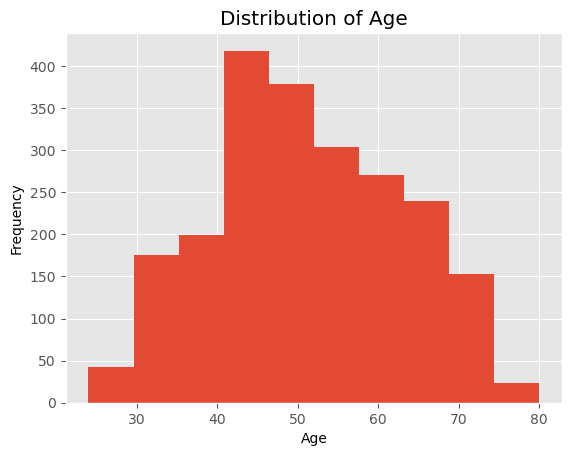

In [54]:
# Distribution of age
plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

The analysis reveals the customer base is largely compososed by adults; with the most active customers ranging betweem 40 and 50.

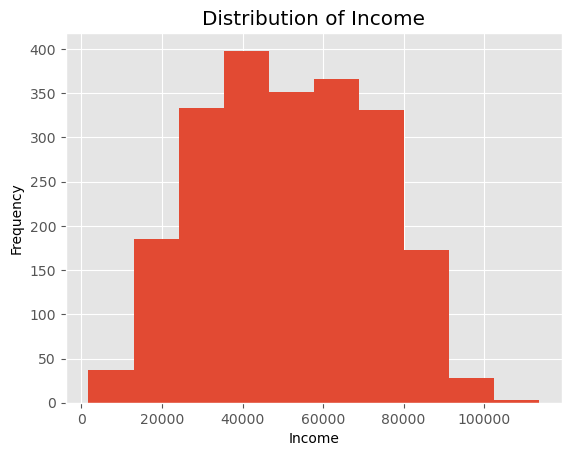

In [55]:
# Distribution of income
plt.hist(df['Income'], bins=10)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

The active customers earns good amount of money with average of 51622.094785. As per distribution of age, big proportion of base are adults.  

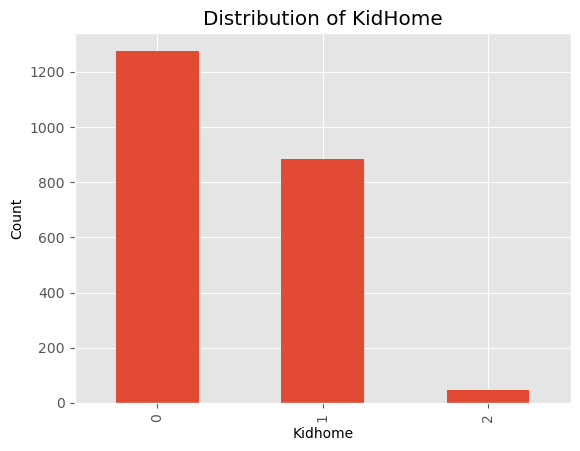

In [57]:
#Distribution of Kidhome
df['Kidhome'].value_counts().plot(kind='bar')
plt.xlabel('Kidhome')
plt.ylabel('Count')
plt.title('Distribution of KidHome')
plt.show()

Most of the customers do not have kids at home

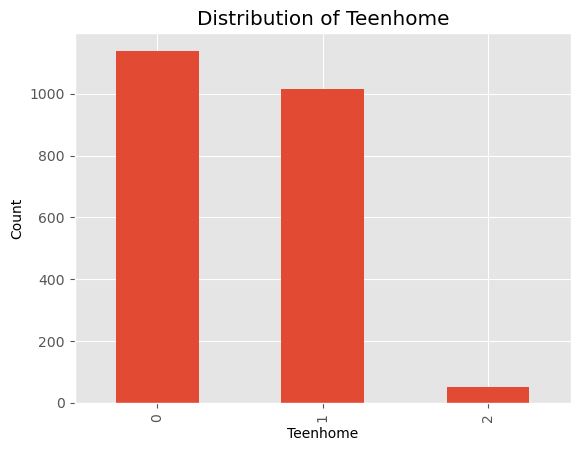

In [58]:
#Distribution of v
df['Teenhome'].value_counts().plot(kind='bar')
plt.xlabel('Teenhome')
plt.ylabel('Count')
plt.title('Distribution of Teenhome')
plt.show()

Most of the customers do not have teens at home

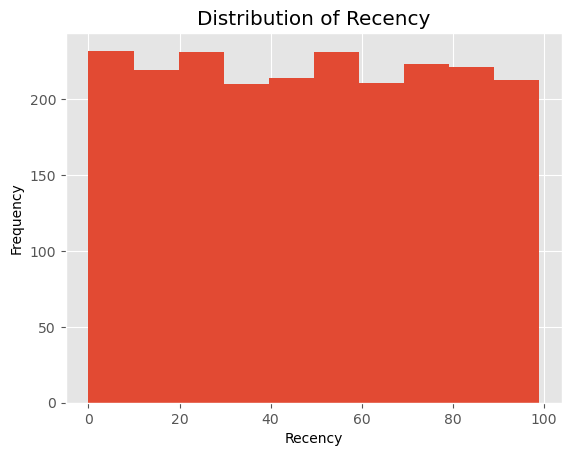

In [59]:
# Distribution of Recency
plt.hist(df['Recency'], bins=10)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Distribution of Recency')
plt.show()

There is a fair distribution of number of days customers takes to purchase again; some customers takes long to buy again and some are frequent buyers.

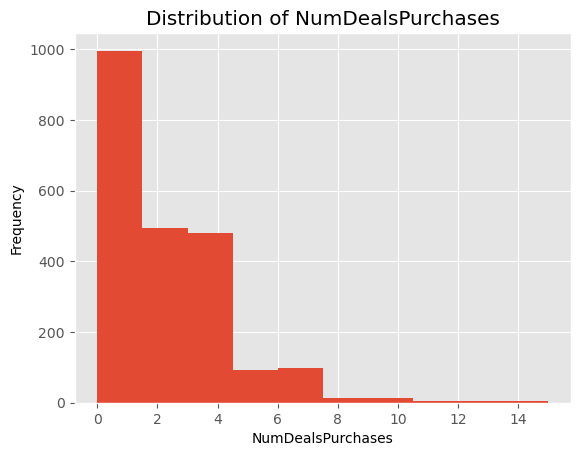

In [60]:
# Distribution of NumDealsPurchases
plt.hist(df['NumDealsPurchases'], bins=10)
plt.xlabel('NumDealsPurchases')
plt.ylabel('Frequency')
plt.title('Distribution of NumDealsPurchases')
plt.show()

There is high number of purchases that were made did not use deal.

### Statistics Analysis



In [38]:
df1.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


- The maximum income earned is 113734.000000 and the average income is  51622.094785. This suggest that the customers are well off individuals.

- The oldest customers is 80 and the youngest is 24. This shows the base is comprised of young to old adults.
- 


**Staticts Analysis - Categorical Features**

In [27]:
# Create a new DataFrame with selected columns
df_edu = df1[['education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master']]
df_edu.describe()

,education_2n Cycle,education_Basic,education_Graduation,education_Master
count,2205.000000,2205.000000,2205.000000,2205.000000
mean,0.089796,0.024490,0.504762,0.165079
std,0.285954,0.154599,0.500091,0.371336
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [28]:
# Melt the DataFrame to convert columns to rows
df_edu = df_edu.melt(var_name='Education', value_name='Value')

# Filter rows with value equal to 1
df_edu = df_edu[df_edu['Value'] == 1]

# Group by 'Education' column and count occurrences
df_edu= df_edu.groupby('Education').size().reset_index(name='Count')

df_edu


,Education,Count
0,education_2n Cycle,198
1,education_Basic,54
2,education_Graduation,1113
3,education_Master,364


The large portion of active customers have graduation level education.

In [47]:
# Create a new DataFrame with selected columns
df_mar = df1[['marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow']]
df_mar.describe()

,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,0.104308,0.387302,0.216327,0.257596,0.034467
std,0.305730,0.487244,0.411833,0.437410,0.182467
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# Melt the DataFrame to convert columns to rows
df_mar = df_mar.melt(var_name='Marital Status', value_name='Value')

# Filter rows with value equal to 1
df_mar = df_mar[df_mar['Value'] == 1]

# Group by 'Education' column and count occurrences
df_mar = df_mar.groupby('Marital Status').size().reset_index(name='Count')

df_mar

,Marital Status,Count
0,marital_Divorced,230
1,marital_Married,854
2,marital_Single,477
3,marital_Together,568
4,marital_Widow,76


The most active customers are married people

In [52]:
# Create a new DataFrame with selected columns
df_cmp = df1[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']]
df_cmp.describe()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,0.073923,0.074376,0.073016,0.064399,0.013605
std,0.261705,0.262442,0.260222,0.245518,0.115872
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# Melt the DataFrame to convert columns to rows
df_cmp = df_cmp.melt(var_name='AcceptedCmp', value_name='Value')

# Filter rows with value equal to 1
df_cmp = df_cmp[df_cmp['Value'] == 1]

# Group by 'Education' column and count occurrences
df_cmp= df_cmp.groupby('AcceptedCmp').size().reset_index(name='Count')

df_cmp

,AcceptedCmp,Count
0,AcceptedCmp1,142
1,AcceptedCmp2,30
2,AcceptedCmp3,163
3,AcceptedCmp4,164
4,AcceptedCmp5,161


The compaign that had high acceptance rate from customers is compaign 3. with 1, 3, and 4 beign close. However, compaign 1 received significantly low acceptance rate. A further analysis will be conducted to invistigate the reason.

In [11]:
#create age groups

bins = pd.IntervalIndex.from_tuples([(17, 30), (30, 40), (40, 50), (50, 60), (60, 100)])
df1['Age'] = pd.cut(df1['Age'], bins)

#Counts in each age group
df1['Age'].value_counts()#.to_frame()

(40, 50]     727
(60, 100]    558
(50, 60]     502
(30, 40]     357
(17, 30]      61
Name: Age, dtype: int64

**Pattern and trends**


The analysis so far shows:

- the most active customers are married having graduation education.
- The most active customers also range from 40 to 50 years of age.
- The customers are relatively well of individuals, monetarly.
- The spent more amount of money on meats product and wines.
- Large portion of the customer base do not have children.
- The customers base is fairly distributed between frequent buyers and those who take days to buy again.
- The customers typically buys from the store than web, however most number of purchases was made from the company's website

### Correlation Analysis

In [8]:
#correlation coefficients between pairs of variables

df2_corr = df1.corr()
df2_corr


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
Income,1.000000,-0.531699,0.042483,0.006716,0.730495,0.537920,0.702500,0.551758,0.555601,0.417653,-0.132427,0.503184,0.710057,0.687206,-0.648306,-0.011181,0.233267,0.416386,0.345242,0.110210,-0.027488,NaN,NaN,0.174902,0.212625,-0.024892,0.013892,-0.010427,-0.015539,-0.001960,0.044336,-0.060621,-0.239604,0.017644,0.021633,0.091176,0.823066,0.816879,0.388247
Kidhome,-0.531699,1.000000,-0.040207,0.011829,-0.499288,-0.374388,-0.445665,-0.389895,-0.379101,-0.356550,0.226434,-0.375590,-0.519813,-0.506543,0.448497,0.015897,-0.162597,-0.205124,-0.174741,-0.082124,0.037025,NaN,NaN,-0.078409,-0.238083,-0.055743,-0.018514,0.019731,0.014525,0.007422,-0.072244,0.019050,0.055308,-0.001930,0.011482,-0.042031,-0.551152,-0.539828,-0.212080
Teenhome,0.042483,-0.040207,1.000000,0.013881,0.002783,-0.176925,-0.267177,-0.206371,-0.164246,-0.019619,0.394341,0.161229,-0.114019,0.047321,0.129365,-0.043223,0.037860,-0.190760,-0.145748,-0.015805,0.007633,NaN,NaN,-0.155196,0.362919,0.019394,0.055852,0.007499,-0.100454,0.027181,0.047962,-0.056259,-0.120519,-0.024698,0.023806,0.092901,-0.142995,-0.146866,-0.130255
Recency,0.006716,0.011829,0.013881,1.000000,0.016470,-0.004909,0.026138,0.001177,0.025535,0.018558,0.000479,-0.005104,0.029750,0.000462,-0.017906,-0.032327,0.017658,0.000334,-0.021097,-0.001390,0.005758,NaN,NaN,-0.200413,0.014228,0.028338,0.001483,-0.021106,-0.000926,0.023908,-0.001348,-0.006789,-0.003093,0.031419,-0.025563,-0.009234,0.021132,0.020241,-0.013344
MntWines,0.730495,-0.499288,0.002783,0.016470,1.000000,0.384947,0.593119,0.395967,0.388613,0.390194,0.011858,0.552342,0.673234,0.639373,-0.329395,0.060700,0.373063,0.472729,0.351346,0.206231,-0.036709,NaN,NaN,0.245559,0.164438,0.168102,0.021679,-0.012597,-0.022598,0.005915,0.034139,-0.096259,-0.140369,-0.060920,0.036403,0.160804,0.902310,0.901848,0.509913
MntFruits,0.537920,-0.374388,-0.176925,-0.004909,0.384947,1.000000,0.568100,0.592556,0.570986,0.392596,-0.136350,0.300813,0.513686,0.459056,-0.424463,0.014131,0.006078,0.208615,0.192061,-0.010147,-0.003135,NaN,NaN,0.122331,0.013149,0.067978,0.010567,-0.013723,0.011982,-0.014210,0.025961,0.025452,-0.060915,0.114919,-0.055581,-0.084301,0.606658,0.594180,0.155133
MntMeatProducts,0.702500,-0.445665,-0.267177,0.026138,0.593119,0.568100,1.000000,0.595673,0.556511,0.375581,-0.165522,0.329453,0.714382,0.517245,-0.543387,0.021224,0.096798,0.389276,0.325306,0.045842,-0.020921,NaN,NaN,0.248821,0.041540,0.089203,-0.021688,-0.027769,0.045575,-0.004064,0.017370,-0.041738,-0.111968,0.064917,-0.004020,-0.004194,0.861392,0.860663,0.319553
MntFishProducts,0.551758,-0.389895,-0.206371,0.001177,0.395967,0.592556,0.595673,1.000000,0.582974,0.425420,-0.145030,0.297776,0.563174,0.456896,-0.453353,-0.000832,0.015513,0.194387,0.261389,0.002093,-0.019299,NaN,NaN,0.107405,0.040855,0.081611,-0.015213,-0.031728,0.013809,0.015502,0.041886,0.061304,-0.059840,0.106227,-0.050153,-0.103952,0.635038,0.620626,0.174675
MntSweetProducts,0.555601,-0.379101,-0.164246,0.025535,0.388613,0.570986,0.556511,0.582974,1.000000,0.355747,-0.122279,0.332057,0.524369,0.454133,-0.429375,0.001099,0.028665,0.258053,0.244771,0.009915,-0.020773,NaN,NaN,0.115326,0.021075,0.080843,-0.000813,-0.005606,-0.002711,-0.011220,0.049347,0.060550,-0.057863,0.104075,-0.067723,-0.085702,0.604514,0.595394,0.200174
MntGoldProds,0.417653,-0.356550,-0.019619,0.018558,0.390194,0.392596,0.375581,0.425420,0.355747,1.000000,0.056926,0.405961,0.471032,0.388575,-0.253022,0.124984,0.02361

#### A) Compiagn Analysis

In [11]:
#Correlation between compaign and the customer group

df3_corr = df1[['Income', #'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
               #'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               #'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
               #'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                'AcceptedCmp2', #'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
               'Age', #'Customer_Days', 
               'marital_Divorced', 'marital_Married',
               'marital_Single', 'marital_Together', 'marital_Widow',
               'education_2n Cycle', 'education_Basic', 'education_Graduation',
               'education_Master', 'education_PhD',# 'MntTotal', 'MntRegularProds',
               #'AcceptedCmpOverall'
              ]].corr()
df3_corr

,Income,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD
Income,1.000000,-0.011181,0.233267,0.416386,0.345242,0.110210,0.212625,0.013892,-0.010427,-0.015539,-0.001960,0.044336,-0.060621,-0.239604,0.017644,0.021633,0.091176
AcceptedCmp3,-0.011181,1.000000,-0.080088,0.080605,0.095350,0.071554,-0.061405,0.016999,-0.000463,0.015739,-0.019771,-0.015375,0.002202,0.022520,-0.014825,-0.013577,0.020276
AcceptedCmp4,0.233267,-0.080088,1.000000,0.312424,0.242503,0.294953,0.069903,0.005052,-0.005384,-0.014598,-0.000972,0.041191,-0.034622,-0.044914,-0.013071,0.018283,0.040317
AcceptedCmp5,0.416386,0.080605,0.312424,1.000000,0.409283,0.222847,-0.019275,-0.021635,0.013042,-0.011975,0.006087,0.013863,-0.027177,-0.044468,0.016503,0.001983,0.013747
AcceptedCmp1,0.345242,0.095350,0.242503,0.409283,1.000000,0.176520,0.011747,-0.016996,0.026562,0.001264,-0.019344,0.001070,0.008072,-0.041569,0.030759,-0.027079,-0.002937
AcceptedCmp2,0.110210,0.071554,0.294953,0.222847,0.176520,1.000000,0.007737,0.023960,-0.037121,-0.014165,0.038244,-0.000730,-0.009502,-0.018608,0.006711,-0.031132,0.033530
Age,0.212625,-0.061405,0.069903,-0.019275,0.011747,0.007737,1.000000,0.069347,-0.045480,-0.128436,0.054820,0.163721,-0.104364,-0.115872,-0.061579,0.074754,0.123429
marital_Divorced,0.013892,0.016999,0.005052,-0.021635,-0.016996,0.023960,0.069347,1.000000,-0.271320,-0.179295,-0.201016,-0.064476,0.006990,-0.044471,0.005653,-0.003870,0.008472
marital_Married,-0.010427,-0.000463,-0.005384,0.013042,0.026562,-0.037121,-0.045480,-0.271320,1.000000,-0.417723,-0.468329,-0.150217,0.010793,-0.005507,-0.003848,-0.007467,0.005984
marital_Single,-0.015539,0.015739,-0.014598,-0.011975,0.001264,-0.014165,-0.128436,-0.179295,-0.417723,1.000000,-0.309483,-0.099267,-0.030177,0.045026,0.015925,-0.005171,-0.010632


In [ ]:
sns.heatmap(df3_corr, annot=True, fmt=".2f", linewidths = 1)
plt.show()

In [5]:
#the average rate of each compaign
df_comp = df1[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                'AcceptedCmp2', 'AcceptedCmpOverall']]
df_comp.mean().to_frame()

,0
AcceptedCmp3,0.073923
AcceptedCmp4,0.074376
AcceptedCmp5,0.073016
AcceptedCmp1,0.064399
AcceptedCmp2,0.013605
AcceptedCmpOverall,0.299320


The analysis reveals that:

These specific customers showed a stronger response to certain campaigns:

- **Compaign 1:** with graduation education level and married.
- **Compaign 2:** with PHD and together.
- **Compaign 3:** with Basic level of education and divorced.
- **Compaign 4:** with PHD and widow.
- **Compaign 5:** with Graduation education level and widow.

#### The success  rate of the compaigns

The average response rate for this campaign is approximately: 

- **Compaign 1:** 6.4%
- **Compaign 2:** 1.4%
- **Compaign 3:** 7.4%
- **Compaign 4:** 7.4%
- **Compaign 5:** 7.3%

This shows that around more of the customers responded positively to 1, 3, 4, and 5 campaign; They managed to engage a higher percentage of customers.. While copmaign 2 received less positive rate from customers, indicating it was less successful in capturing customer interest. Therefore, the most successful were 1, 3, 4 and 5 marketing campaigns. Their effectiveness is about the same level. The results of the second are almost absent.


Let's take the results of the first campaign as a benchmark and compare how different the results of other advertising campaigns are relative to it to compare the effectiveness of a campaign.

This done by calculating relative difference. 
The relative difference values provide insights into how each campaign performed relative to the benchmark campaign, allowing you to evaluate the effectiveness and success of each campaign in terms of response rates.

Benchmark campaign: AcceptedCmp1

**Metrics:**

- AcceptedCmp3: 0.073923
- AcceptedCmp4: 0.074376
- AcceptedCmp5: 0.073016
- AcceptedCmp2: 0.013605

Relative Difference for each campaign:

The formula is:  Relative Difference = Metric Value - Benchmark Metric Value

- AcceptedCmp3: 0.073923 - 0.064399 = 0.009524
- AcceptedCmp4: 0.074376 - 0.064399 = 0.009977
- AcceptedCmp5: 0.073016 - 0.064399 = 0.008617
- AcceptedCmp2: 0.013605 - 0.064399 = -0.050794

The positive relative difference values indicate an improvement or higher response rate compared to the benchmark campaign (AcceptedCmp1). Therefore, campaign 3, 4, and 5 have positive relative differences, suggesting they performed better than the benchmark campaign.

On the other hand, the negative relative difference value for AcceptedCmp2 indicates a decline or lower response rate compared to the benchmark campaign.


Different customer segments may have varying levels of responsiveness to different campaigns.
Next step is to conduct a further analysis to identify specific customer segments and identify a customer segment that show a stronger response to certain campaigns.



#### B) Customer Segment Analysis

In [17]:
from sklearn.cluster import KMeans

# Create a new DataFrame with selected columns for clustering
df_cust = df1[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                    'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
                    'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
                    'marital_Single', 'marital_Together', 'marital_Widow',
                    'education_2n Cycle', 'education_Basic', 'education_Graduation',
                    'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
                    'AcceptedCmpOverall']]


# Apply K-means clustering
k = 4  # the desired number of clusters
kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
kmeans.fit(df_cust)

# Assign the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Analyze and interpret the customer segments
segment_analysis = df.groupby('Cluster').mean()

segment_analysis


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,41525.497682,0.687790,0.642968,49.001546,110.853168,7.936631,44.924266,13.088099,8.160742,26.024730,2.656878,3.193199,1.054096,4.066461,6.383308,0.086553,0.034003,0.000000,0.006182,0.006182,0.012365,3.0,11.0,0.123648,51.287481,2502.993818,0.105100,0.374034,0.228748,0.261206,0.030912,0.077280,0.001546,0.474498,0.208655,0.238022,184.962906,158.938176,0.132921
1,60811.645425,0.227124,0.779412,48.741830,448.769608,31.880719,174.983660,42.887255,29.970588,59.398693,2.954248,5.655229,3.428105,7.740196,4.942810,0.047386,0.111111,0.021242,0.032680,0.016340,0.008170,3.0,11.0,0.104575,54.138889,2528.591503,0.112745,0.405229,0.174837,0.261438,0.045752,0.073529,0.000000,0.483660,0.166667,0.276144,728.491830,669.093137,0.228758
2,23218.809735,0.783186,0.205752,48.701327,17.117257,5.537611,20.878319,8.046460,5.747788,16.309735,2.035398,1.951327,0.455752,2.889381,7.088496,0.077434,0.002212,0.000000,0.000000,0.000000,0.011062,3.0,11.0,0.103982,45.457965,2521.997788,0.092920,0.393805,0.243363,0.252212,0.017699,0.139381,0.117257,0.522124,0.112832,0.108407,57.327434,41.017699,0.079646
3,79449.580972,0.074899,0.265182,49.631579,649.771255,62.894737,443.157895,90.892713,68.012146,74.056680,1.346154,5.329960,5.763158,8.435223,2.852227,0.087045,0.147773,0.299595,0.238866,0.032389,0.004049,3.0,11.0,0.287449,52.232794,2497.299595,0.103239,0.376518,0.226721,0.253036,0.040486,0.080972,0.000000,0.554656,0.153846,0.210526,1314.728745,1240.672065,0.805668


#### Segment Analysis

The following interpretations provide insights into the average characteristics of customers within each cluster based on income, age, purchase behavior, education level, marital status, and complaint creation inorder to create segments of the customers.


**Cluster 0:**

- **Income:** These customers have an average income of around $41,525. The moderate income level.
- **Age:** The average age of customers in this segment is around 51 years.
- **Purchase Behavior:** They have moderate spending on wines, fruits, meat products, and fish products. They make a moderate number of deals, web purchases, catalog purchases, and store purchases.
- **Education Level:** Most customers in this segment have a graduation level of education.
- **Marital Status:** The majority of customers are married.
- **Complain:** The percentage of customers who have made a complaint is relatively low (around 1.2%).
- **Response:** The response rate to marketing campaigns is moderate.

**Cluster 1:**

- **Income:** The average income of these customers is around $60,812. The high earners.
- **Age:** The average age is around 54 years.
- **Purchase Behavior:** They have higher spending on wines, fruits, meat products, and fish products compared to other clusters. The number of deals, web purchases, catalog purchases, and store purchases is also higher.
- **Education Level:** Majority of these customers in this segment have a graduation level of education.
- **Marital Status:** The majority of customers in this segment are married.
- **Complain:** The percentage of customers who have made a complaint is relatively low (around 0.8%).
- **Response:** The response rate to marketing campaigns is relatively high.

**Cluster 2:**

- **Income**: Customers in this segment have an average income of around $23,219. The lowest earners
- **Age:** The average age of customers in this segment is around 45 years.
- **Purchase Behavior:** They have lower spending on wines, fruits, meat products, and fish products compared to other clusters. They make fewer deals, web purchases, catalog purchases, and store purchases.
- **Education Level:** Most customers in this segment have a graduation level of education.
- **Marital Status:** The majority of customers in this segment are single.
- **Complain:** The percentage of customers who have made a complaint is relatively low (around 1.1%).
- **Response:** The response rate to marketing campaigns is relatively low.

**Cluster 3:**

- **Income:** These customers are high earners with an average income of around $79,450. 
- **Age:** The average age of customers in this segment is around 52 years.
- **Purchase Behavior:** They have higher spending on wines, fruits, meat products, and fish products compared to other clusters. They make a lower number of deals, web purchases, catalog purchases, and store purchases.
- **Education Level:** Most customers in this segment have a graduation level of education.
- **Marital Status:** A huge proportion of these customers are married.
- **Complain:** The percentage of customers who have made a complaint is relatively low (around 0.4%).
- **Response:** The response rate to marketing campaigns is relatively high.



#### Patterns and Insights

The impact of marketing campaigns on different groups of customer.

**Customer group 0:** 

- The overall response rate to marketing campaigns is moderate.
- The campaign that received stronger response is campaign 3 and campaign had no response at all.

**Customer group 1:** 


- The response rate to marketing campaigns is relatively high.
- The campaign that received stronger response is campaign 4.

**Customer group 2:** 

- The response rate to marketing campaigns is relatively low.
- The campaign that received stronger response is campaign 3 and the campaigns 1, 2, as well as 5 had no reaction at all.

**Customer group 3:** 

- The response rate to marketing campaigns is relatively high.
- The campaign that received stronger response is campaign 5.
- This is also a group of customers that had the highest reaction at 0.299595 rate.


